## PROBLEM STATEMENT

- In this project, a regression model is developed to predict the probability of being accepted for Graduate school.
- Data Source : https://www.kaggle.com/mohansacharya/graduate-admissions- 
- The dataset contains the following parameters: 
    - GRE Scores ( out of 340 ) 
    - TOEFL Scores ( out of 120 ) 
    - University Rating ( out of 5 ) 
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
    - Undergraduate GPA ( out of 10 ) 
    - Research Experience ( either 0 or 1 ) 
    - Chance of Admit ( ranging from 0 to 1 )
    
<b>Citation:</b> Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Admission.csv')

In [6]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [8]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [10]:
df = df.drop('Serial No.', axis=1)

In [42]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission Chance     0
dtype: int64

<AxesSubplot:>

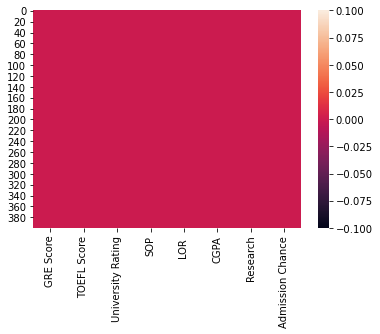

In [44]:
sns.heatmap(df.isnull())

In [21]:
headers = df.columns.values
headers

array(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ',
       'CGPA', 'Research', 'Admission Chance'], dtype=object)

c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. P

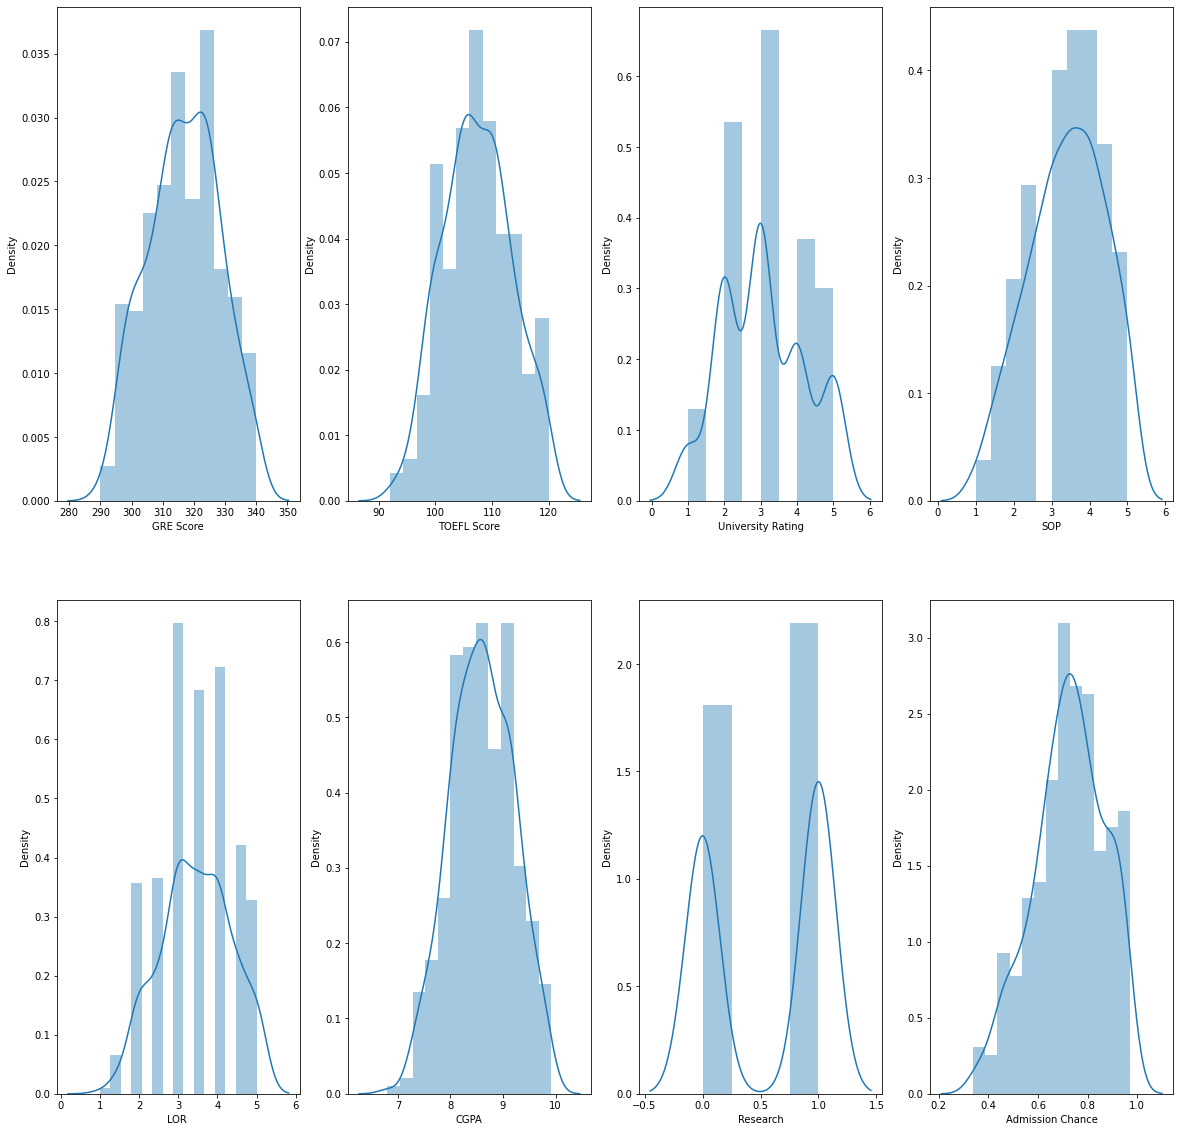

In [37]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 20))

for column_header in headers:
    plt.subplot(2,4,i)
    sns.distplot(df[column_header]);
    i = i + 1


c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\mazedur rahman\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments

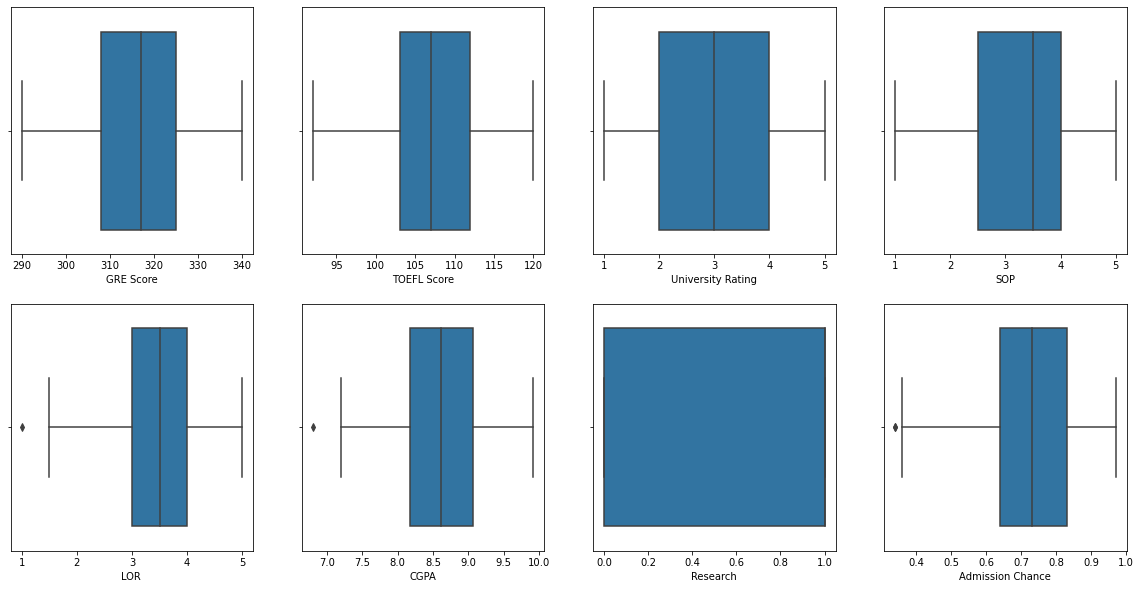

In [41]:
i = 1
fig, ax = plt.subplots(2, 4, figsize = (20, 10))

for column_header in headers:
    plt.subplot(2,4,i)
    sns.boxplot(df[column_header]);
    i = i + 1


In [27]:
corr = df.corr()
corr

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admission Chance,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

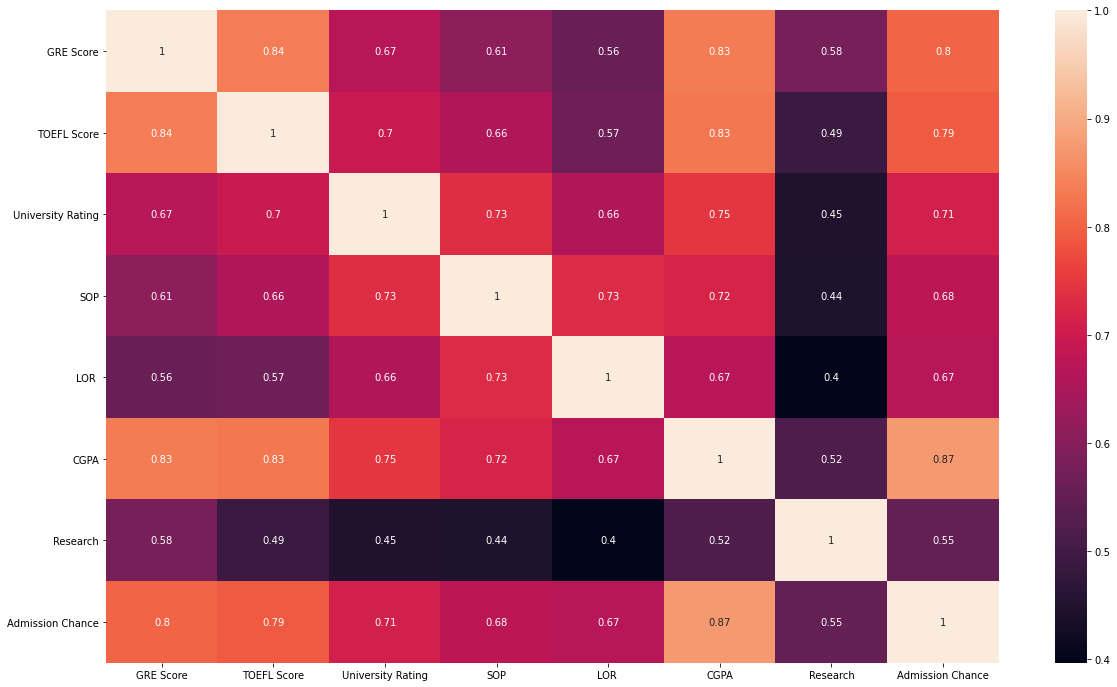

In [32]:
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True)

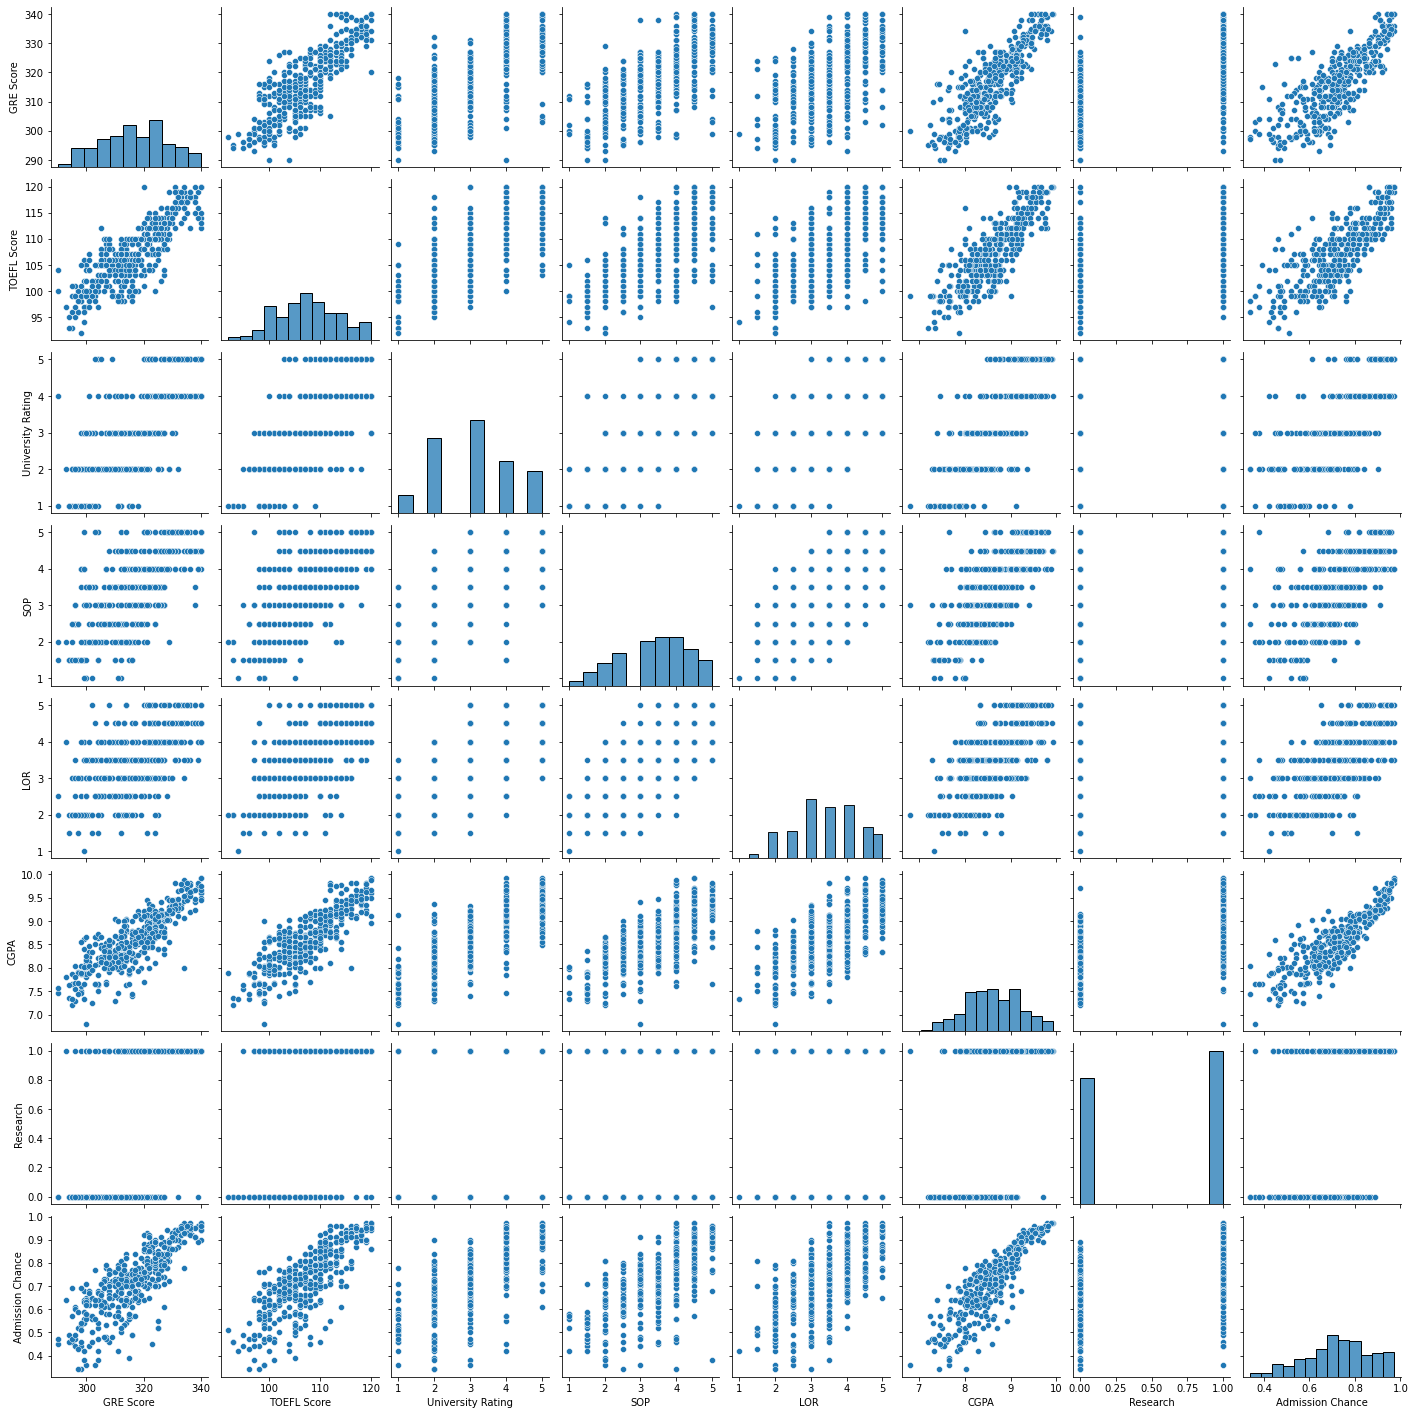

In [33]:
sns.pairplot(df)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Admission Chance   400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [46]:
X = df.drop('Admission Chance', axis=1)

In [47]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [56]:
y = df['Admission Chance'].values.reshape(-1,1)

In [49]:
X.shape

(400, 7)

In [57]:
y.shape

(400, 1)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [63]:
from sklearn.linear_model  import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [66]:
y_pred = lr.predict(X_test)
y_pred

array([[0.74027532],
       [0.65378706],
       [0.95570293],
       [0.73578721],
       [0.82680791],
       [0.70967   ],
       [0.60072792],
       [0.93068084],
       [0.81384766],
       [0.90577489],
       [0.65456654],
       [0.69209344],
       [0.62482792],
       [0.78446165],
       [0.8886698 ],
       [0.61307616],
       [0.7297078 ],
       [0.67683548],
       [0.48496685],
       [0.66977586],
       [0.51259699],
       [0.47244515],
       [0.63624263],
       [0.56951937],
       [0.68794902],
       [0.65697554],
       [0.75305497],
       [0.58785293],
       [0.77977489],
       [0.78477488],
       [0.78549629],
       [0.50306207],
       [0.73222781],
       [0.72441464],
       [0.69272757],
       [0.71509694],
       [0.7249504 ],
       [0.50610707],
       [0.84826509],
       [0.81153562],
       [0.67941798],
       [0.62649414],
       [0.64687421],
       [0.53737296],
       [0.81944111],
       [0.77509579],
       [0.65458272],
       [0.838

In [68]:
lr.coef_

array([[ 0.00184136,  0.00287452,  0.00378949, -0.00259334,  0.02238573,
         0.11622531,  0.02433268]])

In [69]:
lr.intercept_

array([-1.25981315])

In [71]:
import math
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [102]:
print('Coeffcients :',lr.coef_)
print('Intercept :',lr.intercept_)
print('MAE :',mean_absolute_error(y_test,y_pred))
print('MSE :',mean_squared_error(y_test,y_pred))
print('RMSE :',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 :', r2_score(y_test,y_pred))
accuracy_score =format(lr.score(X_test,y_test)*100,'.2f')
print('Accuracy Rate :',accuracy_score,'%')

Coeffcients : [[ 0.00184136  0.00287452  0.00378949 -0.00259334  0.02238573  0.11622531
   0.02433268]]
Intercept : [-1.25981315]
MAE : 0.040622121630515894
MSE : 0.003030406124904052
RMSE : 0.055049124651569636
R2 : 0.8580317882675303
Accuracy Rate : 85.80 %


<AxesSubplot:>

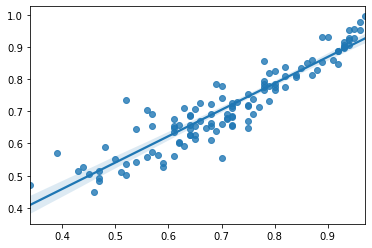

In [95]:
sns.regplot(y_test,y_pred, data=df)